GOAL: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

Import libraries and Load the Data file into Python DataFrame and view top 10 rows

In [ ]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

Load and review data

In [ ]:
vData = pd.read_csv("Part3 - vehicle.csv")  
vData.shape

(846, 19)

In [ ]:
vData.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


Since the focus is on the PCA technique, we will drop the non-numerica variables.

In [ ]:
#dropping/ignoring class
vData = vData.drop(['class'], axis=1)
vData.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


Dealing with Missing Values

In [ ]:
vData.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [ ]:
#instead of dropping the rows, lets replace the missing values with median value. 
vData.median()


compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [ ]:
vData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#vData = vData.fillna(vData.median())

medianFiller = lambda x: x.fillna(x.median())
vData = vData.apply(medianFiller,axis=0)

# **BiVariate Plots**
A bivariate analysis among the different independent variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

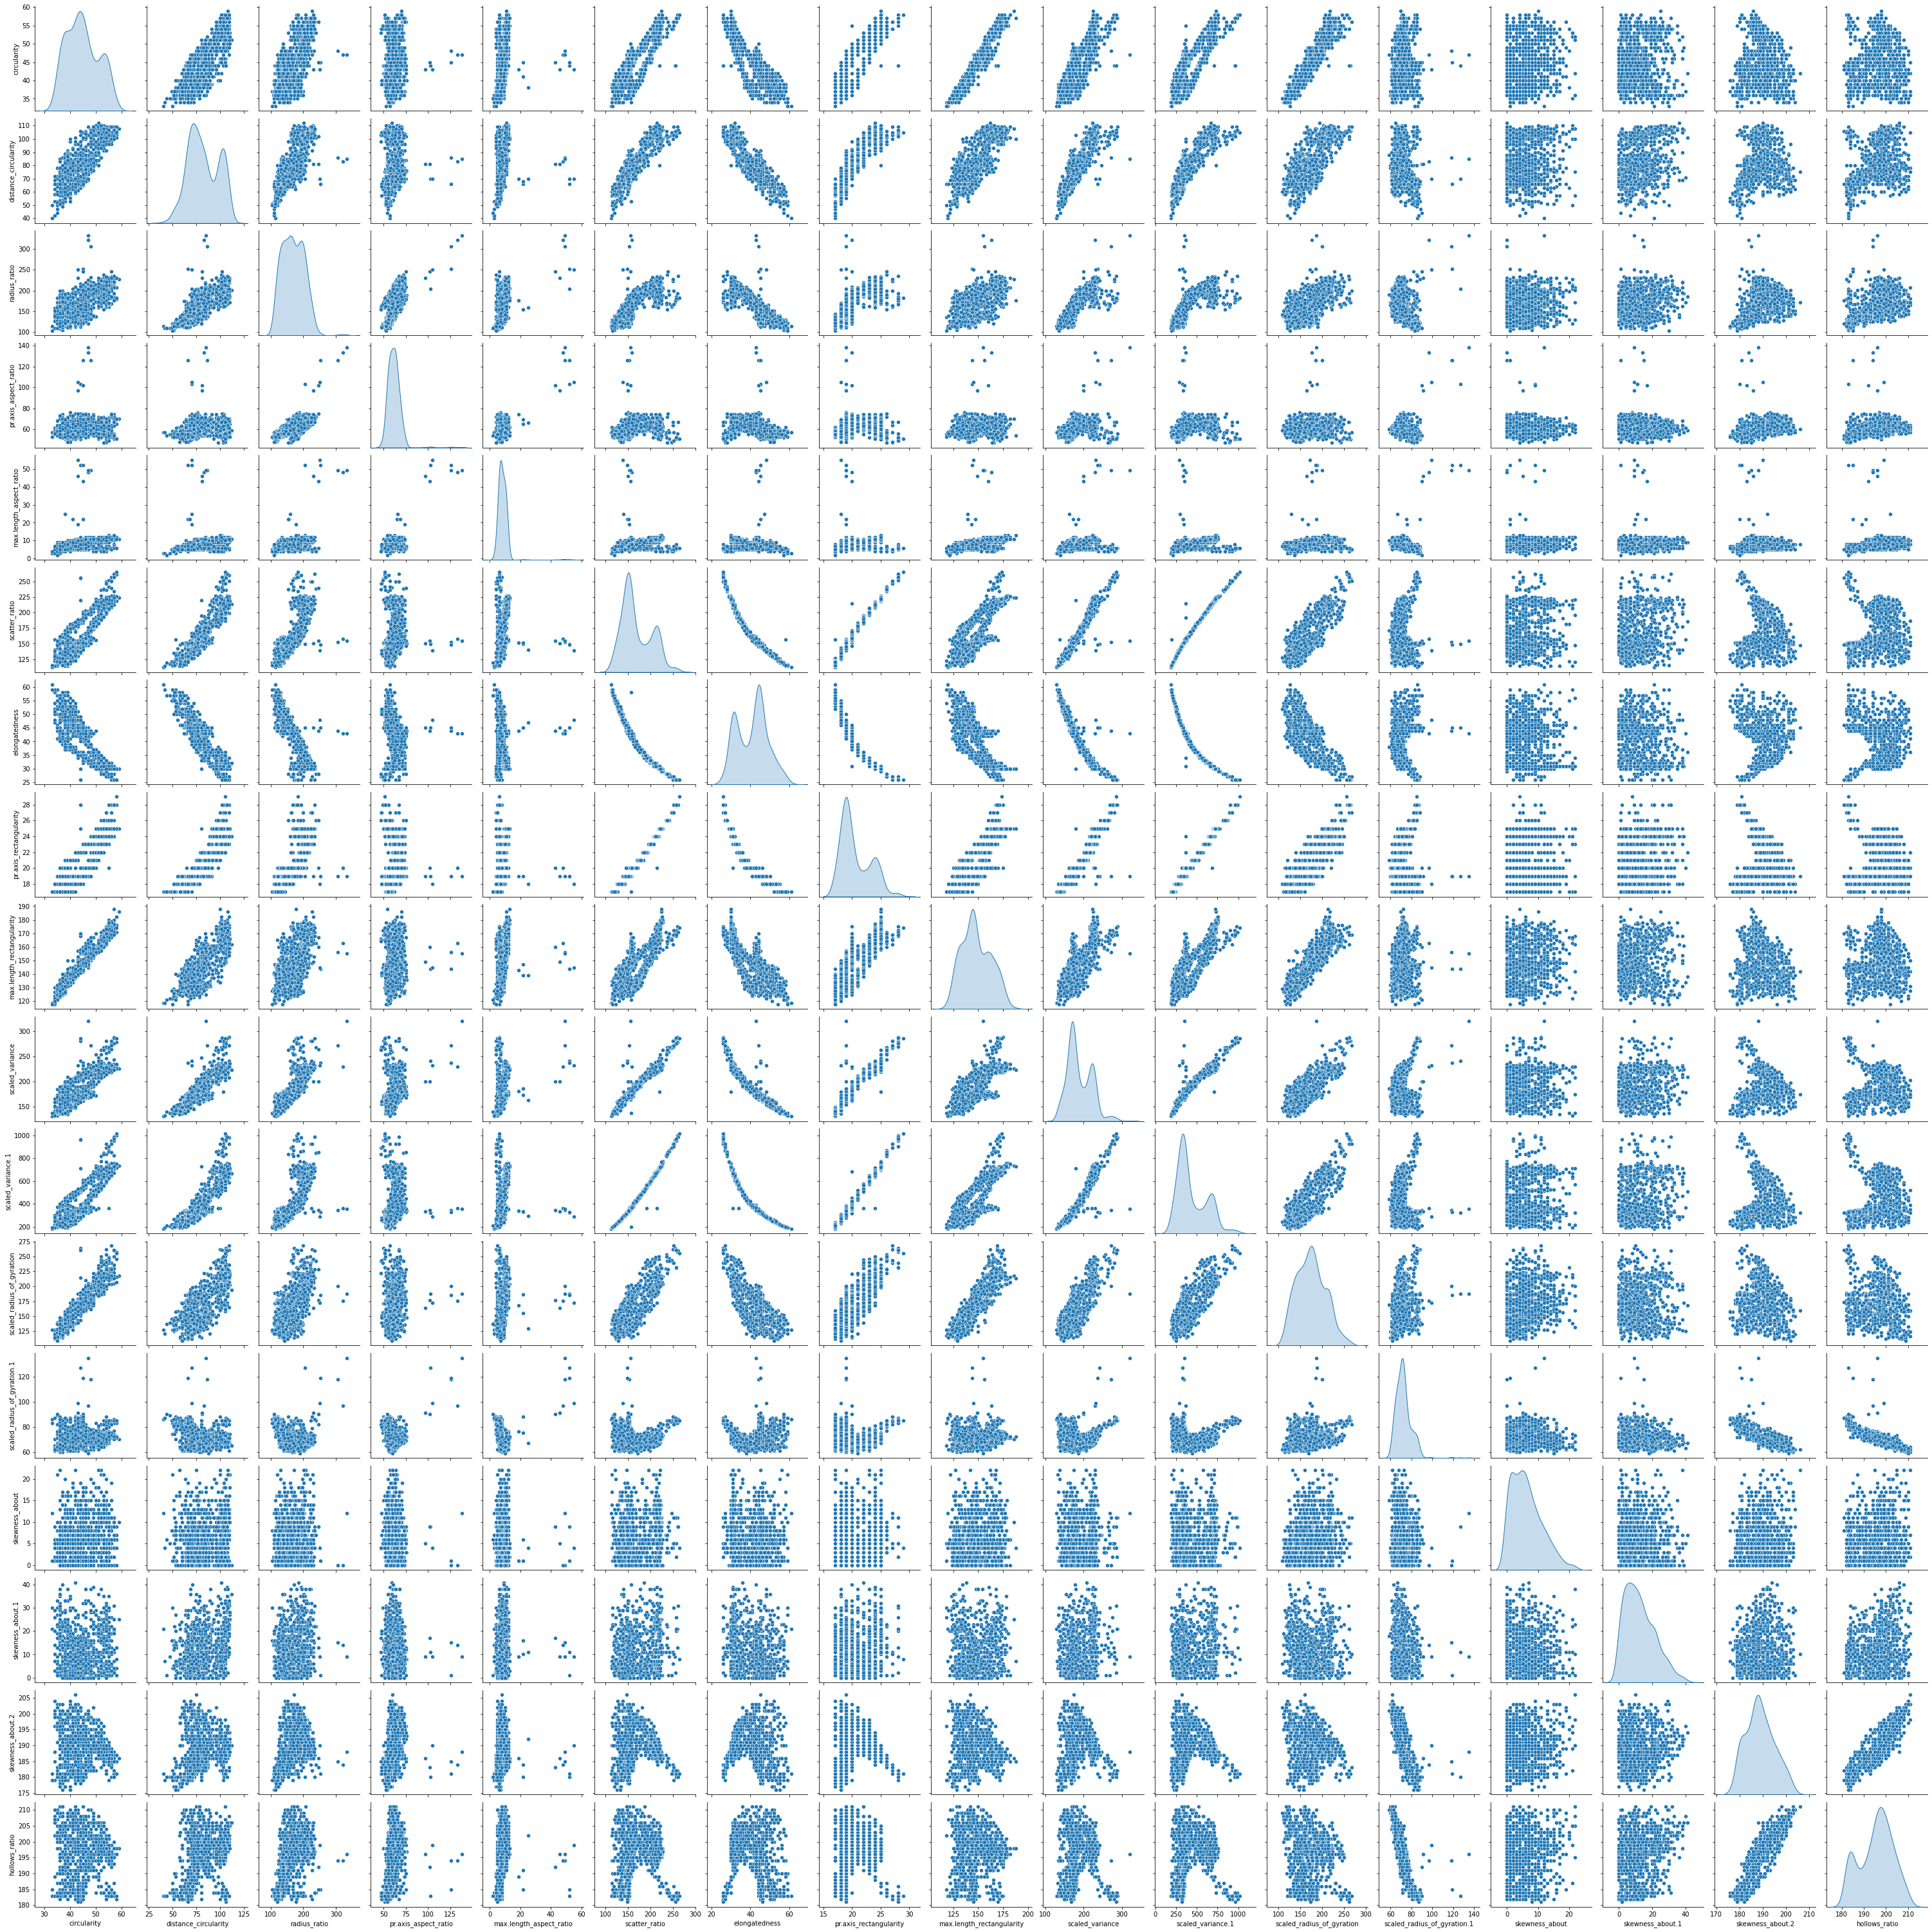

In [ ]:
# independant variables
X = vData.drop(['compactness'], axis=1)
# the dependent variable
y = vData[['compactness']]
sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [40]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [41]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.79325751  0.6216467   0.15396023  0.25176438  0.8489411
  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508  0.92691166
   0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79325751  1.00118343  0.76794246  0.15864319  0.26499957  0.90614687
  -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577  0.70660663
  -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.6216467   0.76794246  1.00118343  0.66423242  0.45058426  0.73529816
  -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618  0.53700678
  -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.15396023  0.15864319  0.66423242  1.00118343  0.64949139  0.10385472
  -0.18325156  0.07969786  0.1270594   0.27323306  0.08929427  0.12211524
   0.15313091 -0.05843967 -0.0320139   0.24016968  0.26804208]
 [ 0.25176438  0.26499957  0.45058426  0.64949139  1.00118343  0.16638787
  -0.18035326  0.16169312  0.30630475  0.31933428  0.1434227   0.18996732
   0.2960

In [42]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# The eigen Values

In [43]:
print(pca.explained_variance_)

[8.71790618 2.96613431 1.87624689 1.17330772 0.91344716 0.53301581]


# The eigen Vectors

In [44]:
print(pca.components_)

[[ 0.30716806  0.31526104  0.27692133  0.08769365  0.1053014   0.32916124
  -0.32633382  0.32565836  0.2957178   0.32239989  0.32541872  0.28711183
  -0.01179208  0.03788366  0.05946042  0.0209435   0.06804691]
 [ 0.11059145 -0.08957193 -0.21290718 -0.14562561 -0.0085409   0.03409268
   0.02959288  0.0470214   0.10228965  0.04502484  0.04076153  0.19545358
   0.48765549 -0.04836948 -0.12967485 -0.54518867 -0.54985485]
 [-0.03347052 -0.07532171  0.2564833   0.63587934  0.59489136 -0.11078503
   0.07528861 -0.12121913 -0.02436481  0.04566162 -0.12087822 -0.03669583
   0.31284553 -0.10605637 -0.09202551 -0.01220674  0.01318744]
 [ 0.19910028 -0.05984492 -0.03906584  0.02425269  0.01512196 -0.08742121
   0.07069244 -0.08516803  0.1980575  -0.11701852 -0.08415307  0.2110097
  -0.08748015  0.59818676 -0.66924685  0.114439    0.05955182]
 [-0.07062272  0.05004981 -0.04418936 -0.04431171  0.20673007 -0.01174039
   0.07026115  0.00513253 -0.04731151 -0.00152259 -0.01686938 -0.04701274
   0.1280

And the percentage of variation explained by each eigen **Vector**

In [45]:
print(pca.explained_variance_ratio_)

[0.51221184 0.17427225 0.11023701 0.06893652 0.05366867 0.03131681]


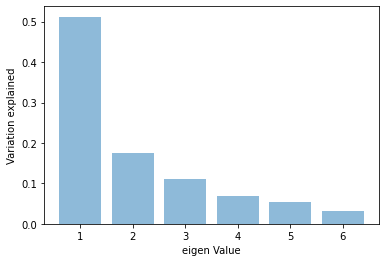

In [46]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

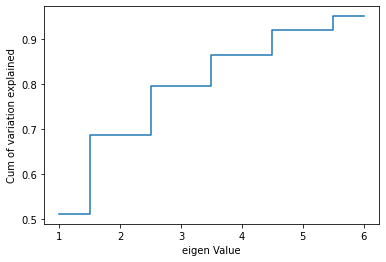

In [47]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# **Dimensionality Reduction**

Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!

In [63]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.30716806  0.31526104  0.27692133  0.08769365  0.1053014   0.32916124
  -0.32633382  0.32565836  0.2957178   0.32239989  0.32541872  0.28711183
  -0.01179208  0.03788366  0.05946042  0.0209435   0.06804691]
 [ 0.11059145 -0.08957193 -0.21290718 -0.14562561 -0.0085409   0.03409268
   0.02959288  0.0470214   0.10228965  0.04502484  0.04076153  0.19545358
   0.48765549 -0.04836948 -0.12967485 -0.54518867 -0.54985485]
 [-0.03347052 -0.07532171  0.2564833   0.63587934  0.59489136 -0.11078503
   0.07528861 -0.12121913 -0.02436481  0.04566162 -0.12087822 -0.03669583
   0.31284553 -0.10605637 -0.09202551 -0.01220674  0.01318744]]
[0.51221184 0.17427225 0.11023701]


In [64]:
Xpca3

array([[ 0.30984644, -0.24821846,  0.99813671],
       [-1.57384909, -0.36935611, -0.35356467],
       [ 3.5612674 ,  0.17294041,  0.11881201],
       ...,
       [ 4.57850548, -0.07063567,  0.51762236],
       [-3.17214734, -0.9709241 , -0.412041  ],
       [-4.64726933,  0.45714557, -0.50405802]])

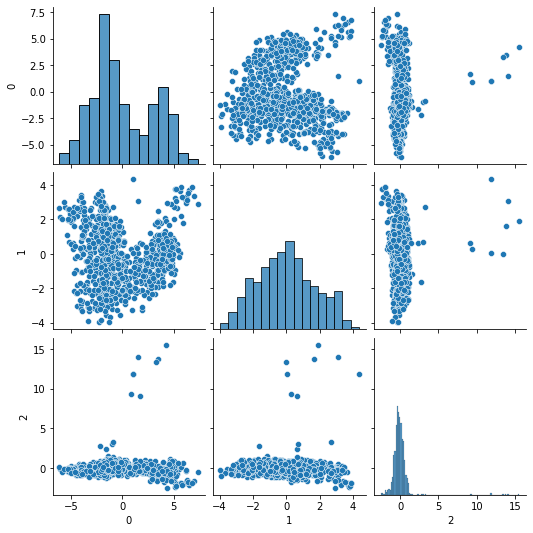

In [65]:
sns.pairplot(pd.DataFrame(Xpca3))

# **Fit Linear Model**

Lets construct two linear models. The first with all the 6 independent variables and the second with only the 3 new variables constructed using PCA.

In [66]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.815308473096498

In [67]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.7344366814564135

**Conclusion:**
Looks like by drop reducing dimensionality by 3, we only dropped around 4% in R^2! This is insample (on training data) and hence a drop in R^2 is expected. Still seems easy to justify the dropping of variables. An out of sample (on test data), with the 3 independent variables is likely to do better since that would be less of an over-fit.